In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('Code_Red_I.csv', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,8,58,4,130,29,6,13,...,0,1,0,0,0,38,0,20,248,-1
1,1,0,1,2,58,7,107,25,6,12,...,1,0,0,0,0,48,0,10,232,-1
2,2,0,2,20,43,6,68,22,5,8,...,0,0,0,0,0,42,0,1,225,-1
3,3,0,3,0,60,7,119,54,6,10,...,0,0,0,0,0,58,0,2,246,-1
4,4,0,4,10,52,6,102,52,5,8,...,0,0,0,0,0,48,0,4,241,-1


In [3]:
df1.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

In [4]:
features = df1.loc[:, 4:40]

In [5]:
df1.iloc[:, 41].value_counts()

-1    6600
 1     600
Name: 41, dtype: int64

In [6]:
X = features
#X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')

In [7]:
def targetify(s):
    if s == -1:
        return 0
    else:
        return 1

In [8]:
df1['Target']=df1.loc[:,41].apply(targetify)

In [9]:
 y = df1['Target']

In [10]:
df1["Target"].value_counts()

0    6600
1     600
Name: Target, dtype: int64

In [11]:
X = X.fillna(0)

In [12]:
X = X.apply(pd.to_numeric, errors='coerce')

In [13]:
X = X.fillna(0)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(5760, 37) (5760,)
(1440, 37) (1440,)


In [15]:
y_train.value_counts()

0    5281
1     479
Name: Target, dtype: int64

In [16]:
y_test.value_counts()

0    1319
1     121
Name: Target, dtype: int64

In [17]:
X_train.head()

,4,5,6,7,8,9,10,11,12,13,...,31,32,33,34,35,36,37,38,39,40
6921,45,6,74,18,6,9,6,4,45,4,...,0,0,0,0,0,0,39,0,6,225
4199,236,8,1113,120,6,14,6,13,409,17,...,0,0,0,1,0,0,203,0,33,319
2862,68,5,252,19,7,11,6,10,293,0,...,1,0,0,0,0,0,48,0,20,276
2370,105,5,175,24,6,11,6,13,182,2,...,1,0,0,0,0,0,93,2,10,238
5285,59,5,108,35,5,11,5,1,40,3,...,1,0,0,0,0,0,51,0,8,236


In [18]:
forest = ExtraTreesClassifier(n_estimators=100, random_state=2)

In [19]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [20]:
importances = forest.feature_importances_

In [21]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [22]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 33: 37 (0.137274)
2. feature 0: 4 (0.137176)
3. feature 2: 6 (0.096312)
4. feature 3: 7 (0.078914)
5. feature 8: 12 (0.069666)
6. feature 11: 15 (0.065440)
7. feature 35: 39 (0.057667)
8. feature 36: 40 (0.057138)
9. feature 1: 5 (0.054926)
10. feature 9: 13 (0.049327)
11. feature 7: 11 (0.049095)
12. feature 12: 16 (0.024744)
13. feature 6: 10 (0.020852)
14. feature 4: 8 (0.020359)
15. feature 34: 38 (0.011988)
16. feature 10: 14 (0.009381)
17. feature 5: 9 (0.009016)
18. feature 31: 35 (0.003925)
19. feature 17: 21 (0.003567)
20. feature 28: 32 (0.003390)
21. feature 13: 17 (0.003171)
22. feature 27: 31 (0.003169)
23. feature 29: 33 (0.003165)
24. feature 15: 19 (0.003069)
25. feature 16: 20 (0.003043)
26. feature 30: 34 (0.002940)
27. feature 18: 22 (0.002904)
28. feature 32: 36 (0.002765)
29. feature 14: 18 (0.002703)
30. feature 19: 23 (0.002610)
31. feature 26: 30 (0.002608)
32. feature 25: 29 (0.002591)
33. feature 21: 25 (0.001866)
34. feature 24: 28

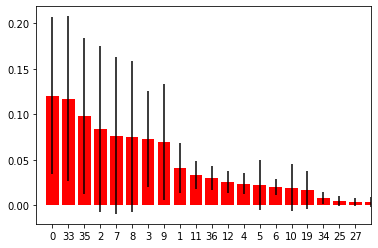

In [55]:
# Plot the top x feature importances of the forest
top_x = 20

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

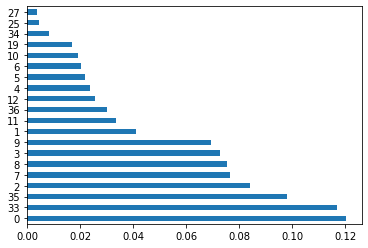

In [56]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")